# 基底関数と正則化

In [3]:
#import 
import pandas as pd
import seaborn as sns
import scipy
import scipy.linalg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.family'] = 'Noto Sans CJK JP' #全体のフォントを設定

## 5.2 区分的多項式とスプライン

In [127]:
# Limits
x0, xi0, xi1, x1 = -1, 1.5, 4.5, 7
y0, y1 = 0, 4

# Sine line
xgrid = scipy.linspace(x0, x1, 100)
ygrid = scipy.cos(xgrid)+2

# Random sample
size_sample = 60
err_sample = scipy.randn(size_sample)*.3
x_sample = scipy.linspace(x0, x1, size_sample)
y_sample = scipy.cos(x_sample)+2+err_sample

Text(0.5,1,'3次自然スプライン')

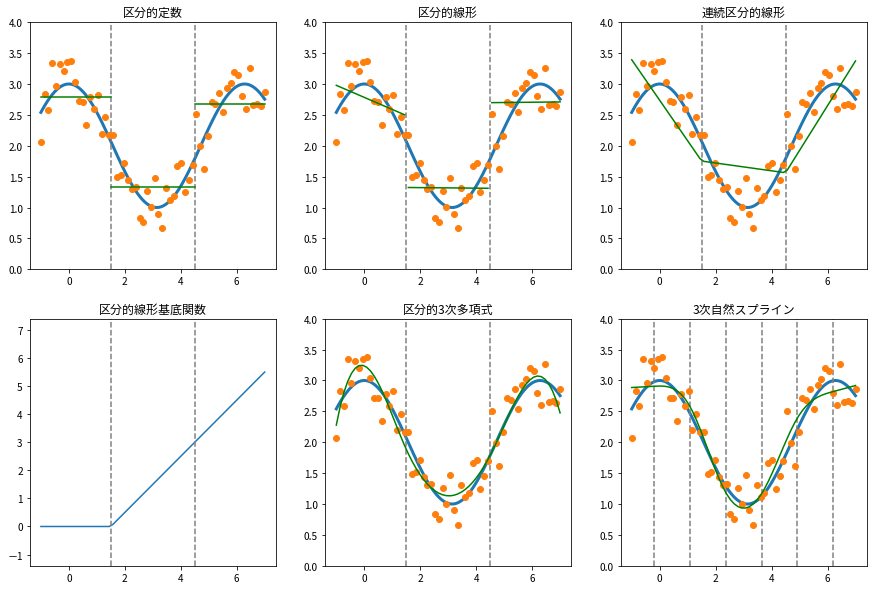

In [6]:
fig51 = plt.figure(51, figsize=(15, 10))
ax1 = fig51.add_subplot(2, 3, 1)
ax1.plot(xgrid, ygrid, linewidth=3)
ax1.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax1.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax1.set_ylim(y0, y1)
ax1.plot(x_sample, y_sample, 'o')

# Split
mask_split1 = x_sample < xi0
mask_split2 = scipy.all([x_sample >= xi0, x_sample < xi1], axis=0)
mask_split3 = xi1 <= x_sample
x_split1 = x_sample[mask_split1]
x_split2 = x_sample[mask_split2]
x_split3 = x_sample[mask_split3]
y_split1 = y_sample[mask_split1]
y_split2 = y_sample[mask_split2]
y_split3 = y_sample[mask_split3]

# 区分的定数
y_split1_mean = y_split1.mean()
y_split2_mean = y_split2.mean()
y_split3_mean = y_split3.mean()
ax1.plot([x0, xi0], [y_split1_mean, y_split1_mean], color='g')
ax1.plot([xi0, xi1], [y_split2_mean, y_split2_mean], color='g')
ax1.plot([xi1, x1], [y_split3_mean, y_split3_mean], color='g')
ax1.set_title(u'区分的定数')

# 区分的線形
y_split1_centered = y_split1-y_split1_mean
y_split2_centered = y_split2-y_split2_mean
y_split3_centered = y_split3-y_split3_mean

beta_split1 = y_split1_centered.dot(x_split1)/(x_split1*x_split1).sum()
beta_split2 = y_split2_centered.dot(x_split2)/(x_split2*x_split2).sum()
beta_split3 = y_split3_centered.dot(x_split3)/(x_split3*x_split3).sum()

y_split1_hat = beta_split1*x_split1+y_split1_mean
y_split2_hat = beta_split2*x_split2+y_split2_mean
y_split3_hat = beta_split3*x_split3+y_split3_mean

ax2 = fig51.add_subplot(2, 3, 2)
ax2.plot(xgrid, ygrid, linewidth=3)
ax2.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax2.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax2.set_ylim(y0, y1)
ax2.plot(x_sample, y_sample, 'o')

ax2.plot(x_split1, y_split1_hat, color='g')
ax2.plot(x_split2, y_split2_hat, color='g')
ax2.plot(x_split3, y_split3_hat, color='g')
ax2.set_title(u'区分的線形')

# 連続区分的線形
h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = scipy.where(x_sample < xi0, 0, x_sample-xi0)
h4 = scipy.where(x_sample < xi1, 0, x_sample-xi1)
H = scipy.vstack((h1, h2, h3, h4)).T

## 最小二乗法
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat = H @ beta

ax3 = fig51.add_subplot(2, 3, 3)
ax3.plot(xgrid, ygrid, linewidth=3)
ax3.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax3.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax3.set_ylim(y0, y1)
ax3.plot(x_sample, y_sample, 'o')
ax3.plot(x_sample, y_hat, color='g')
ax3.set_title(u'連続区分的線形')

ax4 = fig51.add_subplot(2, 3, 4)
ax4.plot(x_sample, h3)
ax4.plot([xi0, xi0], ax4.get_xlim(), '--', color='gray')
ax4.plot([xi1, xi1], ax4.get_xlim(), '--', color='gray')
ax4.set_ylim(ax4.get_xlim())
ax4.set_title(u'区分的線形基底関数')

# 3次スプライン
h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = scipy.copy(x_sample*x_sample)
h4 = scipy.copy(x_sample*x_sample*x_sample)
h5 = scipy.where(x_sample < xi0, 0, (x_sample-xi0)**3)
h6 = scipy.where(x_sample < xi1, 0, (x_sample-xi1)**3)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

## 最小二乗法
HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat_2 = H @ beta

ax5 = fig51.add_subplot(2, 3, 5)
ax5.plot(xgrid, ygrid, linewidth=3)
ax5.plot([xi0, xi0], [y0, y1], '--', color='gray')
ax5.plot([xi1, xi1], [y0, y1], '--', color='gray')
ax5.set_ylim(y0, y1)
ax5.plot(x_sample, y_sample, 'o')
ax5.plot(x_sample, y_hat_2, color='g')
ax5.set_title(u'区分的3次多項式')

# 3次自然スプライン
xis = scipy.array([.1, .26, .42, .58, .74, .9])*8-1
def d(x:scipy.ndarray, xis:scipy.ndarray, k:int)->scipy.ndarray:
    return (scipy.where(x < xis[k], 0, (x-xis[k])**3)
            - scipy.where(x < xis[-1], 0, (x-xis[-1])**3))/(xis[-1]-xis[k])

h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = d(x_sample, xis, 0)-d(x_sample, xis, -2)
h4 = d(x_sample, xis, 1)-d(x_sample, xis, -2)
h5 = d(x_sample, xis, 2)-d(x_sample, xis, -2)
h6 = d(x_sample, xis, 3)-d(x_sample, xis, -2)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ y_sample)
y_hat_3 = H @ beta

ax6 = fig51.add_subplot(2, 3, 6)
ax6.plot(xgrid, ygrid, linewidth=3)
for xi in xis:
    ax6.plot([xi, xi], [y0, y1], '--', color='gray')
ax6.set_ylim(y0, y1)
ax6.plot(x_sample, y_sample, 'o')
ax6.plot(x_sample, y_hat_3, color='g')
ax6.set_title(u'3次自然スプライン')

### 南アフリカの心臓疾患データ

In [19]:
df_saheart = pd.read_csv('./data/heart/SAheart.data', index_col=0)
df_saheart.describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


### 音素認識

In [5]:
df_phoneme = pd.read_csv('./data/phoneme/phoneme.data', index_col=0)
print(df_phoneme.shape)
df_phoneme.head()

(4509, 258)


,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.249,x.250,x.251,x.252,x.253,x.254,x.255,x.256,g,speaker
row.names,,,,,,,,,,,,,,,,,,,,,
1,9.85770,9.20711,9.81689,9.01692,9.05675,8.92518,11.28308,11.52980,10.79713,9.04747,...,12.68076,11.20767,13.69394,13.72055,12.16628,12.92489,12.51195,9.75527,sh,train.dr1.mcpm0.sa1
2,13.23079,14.19189,15.34428,18.11737,19.53875,18.32726,17.34169,17.16861,19.63557,20.15212,...,8.45714,8.77266,9.59717,8.45336,7.57730,5.38504,9.43063,8.59328,iy,train.dr1.mcpm0.sa1
3,10.81889,9.07615,9.77940,12.20135,12.59005,10.53364,8.54693,9.46049,11.96755,12.05282,...,5.00824,5.51019,5.95725,7.04992,7.02469,6.58416,6.27058,3.85042,dcl,train.dr1.mcpm0.sa1
4,10.53679,9.12147,10.84621,13.92331,13.52476,10.27831,8.97459,11.57109,12.35839,10.47826,...,5.85688,5.40324,6.07126,5.30651,4.27412,3.63384,3.22823,4.63123,dcl,train.dr1.mcpm0.sa1
5,12.96705,13.69454,14.91182,18.22292,18.45390,17.25760,17.79614,17.76387,18.99632,17.40394,...,8.00151,7.58624,6.65202,7.69109,6.93683,7.03600,7.01278,8.52197,aa,train.dr1.mcpm0.sa1


In [100]:
aa_fig = df_phoneme[df_phoneme['g']=='aa'][:10].drop(columns=['g','speaker'])
ao_fig = df_phoneme[df_phoneme['g']=='ao'][:10].drop(columns=['g','speaker'])

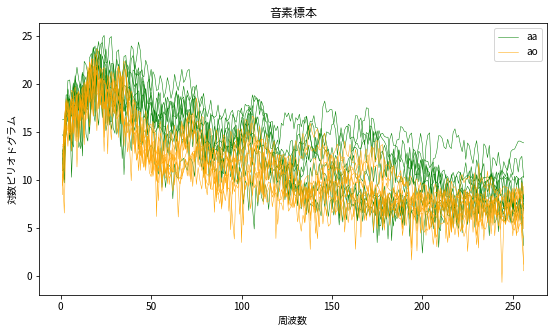

In [101]:
fig55 = plt.figure(55, figsize=(20, 5))
ax = fig55.add_subplot(1, 2, 1)
grid_x = range(1, 257)
plt_aa = ax.plot(grid_x, aa_fig.as_matrix().T,
                 color='green', linewidth=.5, label='aa')
plt_ao = ax.plot(grid_x, ao_fig.as_matrix().T,
                 color='orange', linewidth=.5, label='ao')
ax.legend((plt_aa[0], plt_ao[0]), ('aa', 'ao'))
ax.set_xlabel('周波数')
ax.set_ylabel('対数ピリオドグラム')
ax.set_title('音素標本')
plt.show()

ロジスティック回帰

In [118]:
aa_df = df_phoneme[df_phoneme['g']=='aa']
ao_df = df_phoneme[df_phoneme['g']=='ao']

In [120]:
# アンダーサンプリング
ao_df = ao_df.sample(n=695)
print(aa_df.shape, ao_df.shape)

(695, 258) (695, 258)


In [121]:
dataset = pd.concat([aa_df, ao_df])
X = dataset.drop(columns=['speaker', 'g'])
Y = dataset['g']
Y = Y.map({'aa': 1, 'ao': 0})

In [122]:
mat_X = X.as_matrix()
size_training, size_predictor = mat_X.shape
size_beta = size_predictor + 1

vec_y = Y.as_matrix()
mat_1X = scipy.hstack((scipy.ones((size_training, 1)), mat_X))

def fvec_p(mat_x:scipy.ndarray, vec_beta:scipy.ndarray)->scipy.ndarray:
    num = scipy.exp(mat_x@vec_beta)
    return num/(num+1)

def fdiag_W(mat_x:scipy.ndarray, vec_beta:scipy.ndarray)->scipy.ndarray:
    vec_p = fvec_p(mat_x, vec_beta)
    return vec_p*(1-vec_p)

In [162]:
vec_beta_old = scipy.zeros(size_beta)
vec_increment = scipy.ones(size_beta)
while (vec_increment**2).sum() > 1e-8:
    vec_p = fvec_p(mat_1X, vec_beta_old)
    gradient = mat_1X.T @ (vec_y-vec_p)
    hessian = mat_1X.T @ scipy.diag(fdiag_W(mat_1X, vec_beta_old)) @ mat_1X
    vec_increment = scipy.linalg.solve(hessian, gradient)
    vec_beta_new = vec_beta_old + vec_increment
    vec_beta_old = vec_beta_new.copy()

スプライン

In [175]:
vec_beta_sp = np.delete(vec_beta_new, 0)

grid_x = range(0, 256)
x_sample = scipy.linspace(0, 256, 256)

# 3次自然スプライン
xis = scipy.array([.1, .26, .42, .58, .74, .9])*256-1
def d(x:scipy.ndarray, xis:scipy.ndarray, k:int)->scipy.ndarray:
    return (scipy.where(x < xis[k], 0, (x-xis[k])**3)
            - scipy.where(x < xis[-1], 0, (x-xis[-1])**3))/(xis[-1]-xis[k])

h1 = scipy.ones_like(x_sample)
h2 = scipy.copy(x_sample)
h3 = d(x_sample, xis, 0)-d(x_sample, xis, -2)
h4 = d(x_sample, xis, 1)-d(x_sample, xis, -2)
h5 = d(x_sample, xis, 2)-d(x_sample, xis, -2)
h6 = d(x_sample, xis, 3)-d(x_sample, xis, -2)
H = scipy.vstack((h1, h2, h3, h4, h5, h6)).T

HH = H.T @ H
beta = scipy.linalg.solve(HH, H.T @ vec_beta_sp)
y_hat_4 = H @ beta

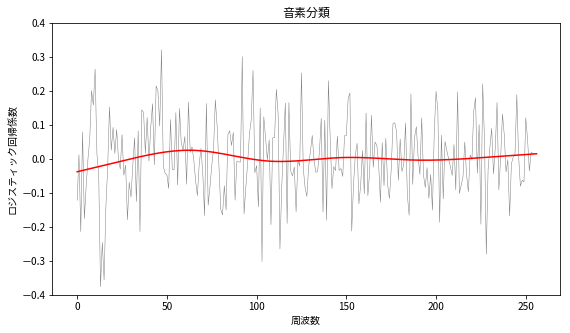

In [176]:
fig55 = plt.figure(55, figsize=(20, 5))
ax = fig55.add_subplot(1, 2, 1)
ax.plot(xgrid, ygrid, linewidth=3)
ax.set_ylim(-0.4, 0.4)
ax.plot(grid_x, vec_beta_sp,
                 color='gray', linewidth=.5)
ax.plot(x_sample, y_hat_4, color='r')
ax.set_xlabel('周波数')
ax.set_ylabel('ロジスティック回帰係数')
ax.set_title(u'音素分類')
plt.show()

## 5.4 平滑化スプライン

In [142]:
df_spmbnd = pd.read_table('./data/spnbmd/spnbmd.data', index_col=0)
df_spmbnd = df_spmbnd.sort_values(by='age')
df_mal = df_spmbnd[df_spmbnd['gender']=='male'].groupby('age').mean().reset_index()
df_fem = df_spmbnd[df_spmbnd['gender']=='female'].groupby('age').mean().reset_index()

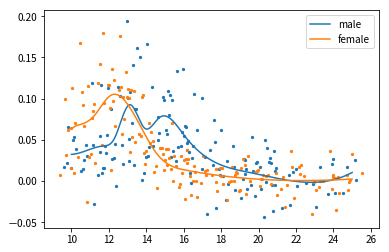

In [166]:
x_mal = df_mal['age'].values
y_mal = df_mal['spnbmd'].values

x_fem = df_fem['age'].values
y_fem = df_fem['spnbmd'].values

spl_mal = UnivariateSpline(x_mal, y_mal)
spl_mal.set_smoothing_factor(0.18)

spl_fem = UnivariateSpline(x_fem, y_fem)
spl_fem.set_smoothing_factor(0.12)

xs = np.linspace(10, 25, 10000)
plt.plot(xs, spl_mal(xs), 'C0', label="male")
plt.plot(xs, spl_fem(xs), 'C1', label="female")
plt.legend()

plt.scatter(x_mal, y_mal, c='C0', s=5)
plt.scatter(x_fem, y_fem, c='C1', s=5)